# Airline Performance Analysis
## by Uche Ofia

## Investigation Overview

The goal of this exploration was to try and find patterns in flight data to predict flights that could be delayed, diverted or cancelled. The main aspects focused on were delay times, airline carriers and day of week.

## Dataset Overview

The data used here is a subset of the original data. This data contains over 30 million flight records between the year 2000 and 2008. The variables analyzed include arrival delay, departure delay, airline carrier, cancelled flights, diverted flights and delayed flights.

In [2]:
# import all packages and set plots to be embedded inline
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
def get_datasets():
    data = {}
    files = os.listdir("airline/saved_data/")
    paths = [f"airline/saved_data/{file}" for file in files]
    dataframes = [pd.read_csv(path) for path in paths]
    
    for idx in range(len(files)):
        name = files[idx].split('.')[0]
        data[name] = dataframes[idx]
    return data

dfs = get_datasets()

# List of tables were working with
dfs.keys()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Causes of Cancelled Flights

Consistently across the years, the major cause of cancelled flights was due to circumstances within the airline company's control, such as fueling, maintenance and crew problems. That is closely followed by weather delays.


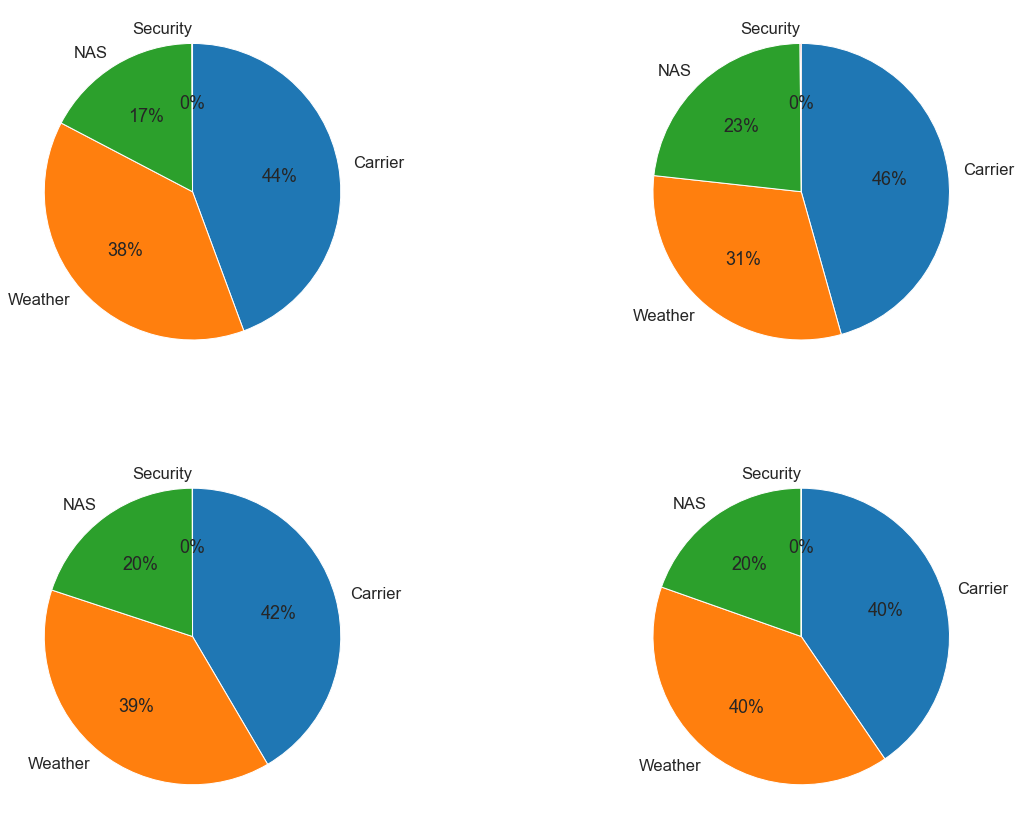

In [5]:
labels = ['Carrier', 'Weather', 'NAS', 'Security']
sns.set_theme(style="darkgrid", palette=None, font_scale=1.5)
base_color = sns.color_palette("husl", 9)

def pie_multi():
    plt.figure(figsize=[20, 14])
    
    plt.subplot(2, 2, 1)
    cg3 = dfs['cancelled_flights_2005'].groupby("CancellationCode").sum()["Flights"]
    plt.pie(x=cg3, labels=labels, startangle=90, counterclock=False, autopct='%.0f%%');
    
    plt.subplot(2, 2, 2)
    cg4 = dfs['cancelled_flights_2006'].groupby("CancellationCode").sum()["Flights"]
    plt.pie(x=cg4, labels=labels, startangle=90, counterclock=False, autopct='%.0f%%');
    
    plt.subplot(2, 2, 3)
    cg5 = dfs['cancelled_flights_2007'].groupby("CancellationCode").sum()["Flights"]
    plt.pie(x=cg5, labels=labels, startangle=90, counterclock=False, autopct='%.0f%%');
    
    plt.subplot(2, 2, 4)
    cg6 = dfs['cancelled_flights_2008'].groupby("CancellationCode").sum()["Flights"]
    plt.pie(x=cg6, labels=labels, startangle=90, counterclock=False, autopct='%.0f%%');

pie_multi()

## Average Delay Times By Weekday

There is no consistent pattern for a day of the week that has more delay times but we can see that the mean delay times for each year all fall within the range of 28 to 40 minutes.

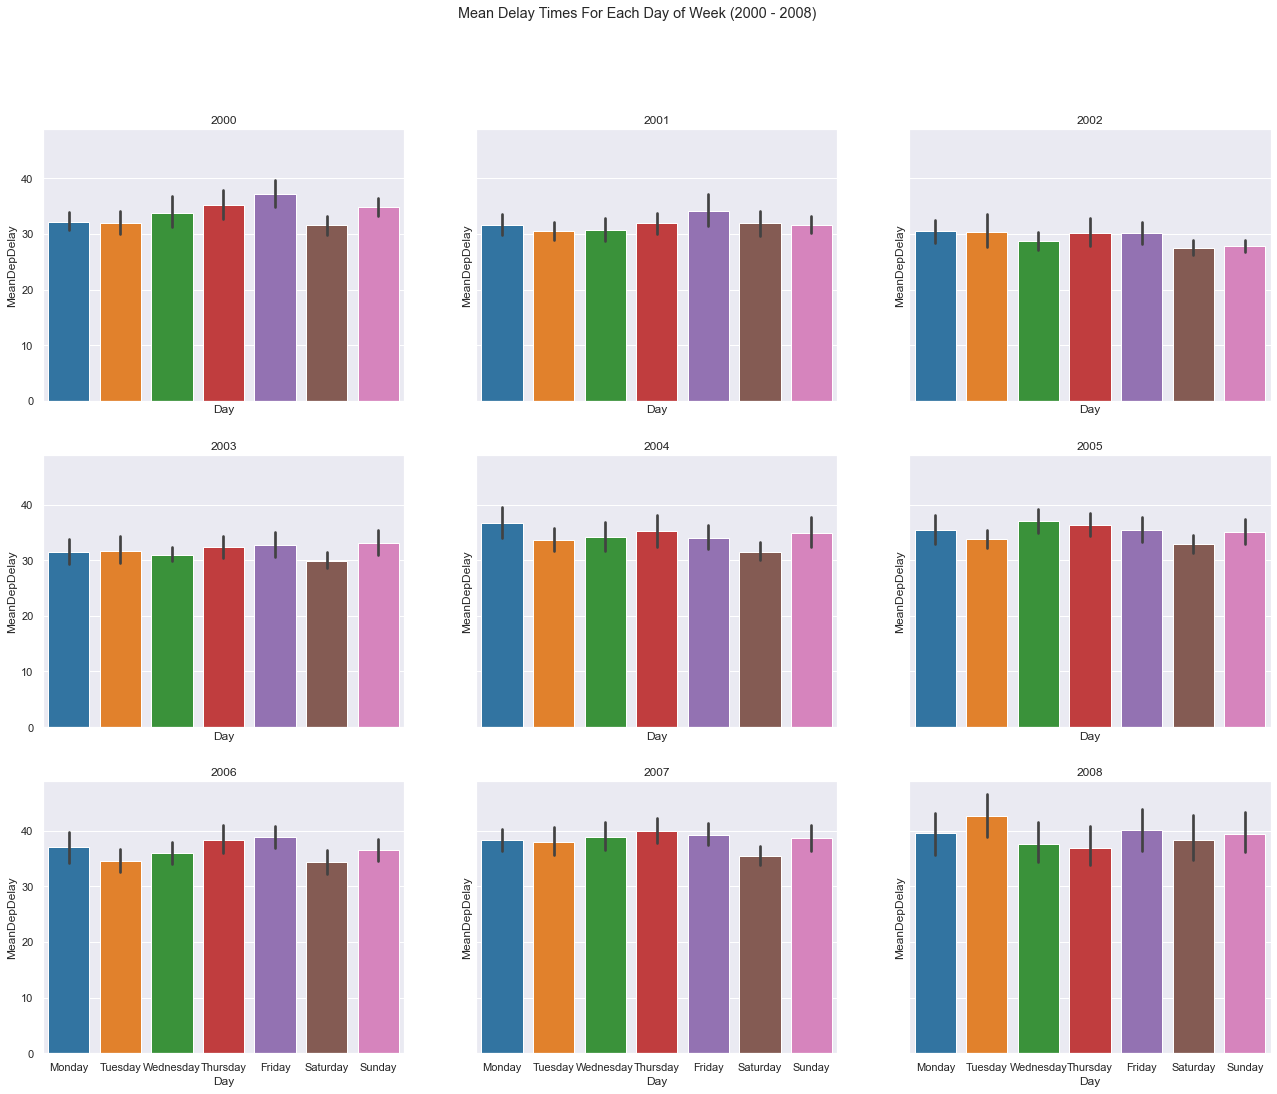

In [11]:
sns.set_theme(style="darkgrid", palette=None, font_scale=1)

def bar_plot_err_multi():
    fig, ax = plt.subplots(ncols = 3, nrows = 3 , figsize = [22,14], sharex=True, sharey=True)
    fig.suptitle("Mean Delay Times For Each Day of Week (2000 - 2008)")
    
    ax[0, 0].set_title("2000")
    sns.barplot(data=dfs['delays_2000'], x='Day', y='MeanDepDelay', ax = ax[0, 0])
    # plt.xlabel("Days of Week (2000)")

    ax[0, 1].set_title("2001")
    sns.barplot(data=dfs['delays_2001'], x='Day', y='MeanDepDelay', ax = ax[0, 1])
    # plt.xlabel("Days of Week (2001)")

    ax[0, 2].set_title("2002")
    sns.barplot(data=dfs['delays_2002'], x='Day', y='MeanDepDelay', ax = ax[0, 2])
    # plt.xlabel("Days of Week (2002)")

    ax[1, 0].set_title("2003")
    sns.barplot(data=dfs['delays_2003'], x='Day', y='MeanDepDelay', ax = ax[1, 0])
    # plt.xlabel("Days of Week (2003)")

    ax[1, 1].set_title("2004")
    sns.barplot(data=dfs['delays_2004'], x='Day', y='MeanDepDelay', ax = ax[1, 1])
    # plt.xlabel("Days of Week (2004)")

    ax[1, 2].set_title("2005")
    sns.barplot(data=dfs['delays_2005'], x='Day', y='MeanDepDelay', ax = ax[1, 2])
    # plt.xlabel("Days of Week (2005)")

    ax[2, 0].set_title("2006")
    sns.barplot(data=dfs['delays_2006'], x='Day', y='MeanDepDelay', ax = ax[2, 0])
    # plt.xlabel("Days of Week (2006)")

    ax[2, 1].set_title("2007")
    sns.barplot(data=dfs['delays_2007'], x='Day', y='MeanDepDelay', ax = ax[2, 1])
    # plt.xlabel("Days of Week (2007)")

    ax[2, 2].set_title("2008")
    sns.barplot(data=dfs['delays_2008'], x='Day', y='MeanDepDelay', ax = ax[2, 2])
    # plt.xlabel("Days of Week (2008)")

    plt.show();

bar_plot_err_multi() 

## Carrier Performance

American Eagle Airlines Inc. has the highest number of cancelled flights by a wide margin (over 20,000), followed by American Airlines Inc. with over 17,000 cancelled flights. Numbers for diverted flights were generally much lower than that of cancelled flights with American Airlines Inc. and Southwest Airlines Co. coming out on top.


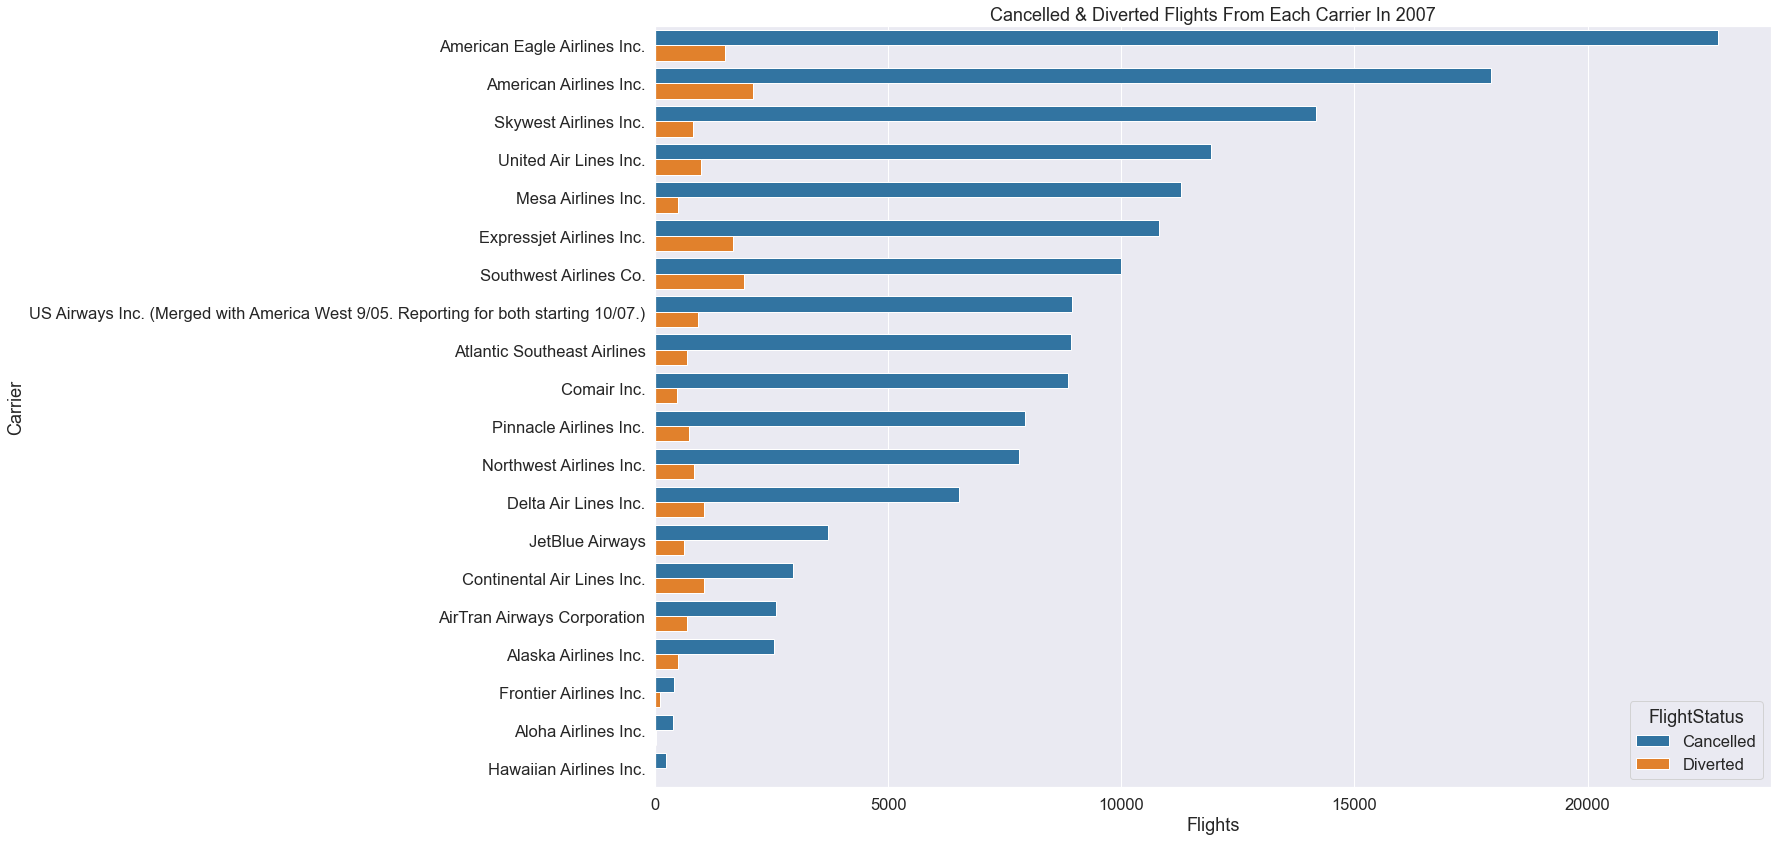

In [13]:
sns.set_theme(style="darkgrid", palette=None, font_scale=1.5)
flights_changed_2007 = dfs['flights_changed_2007'].sort_values(by='Flights', ascending=False)

def plot_horizontal_clustered():
    #Sort by descending order of number of flights
    
    plt.figure(figsize=[20,14])
    
    sns.barplot(data = flights_changed_2007, y = 'Carrier', x = 'Flights', hue = 'FlightStatus')
    plt.title("Cancelled & Diverted Flights From Each Carrier In 2007")
    plt.show()

plot_horizontal_clustered()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [19]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 874080 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "O:\Anaconda\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "O:\Anaconda\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "O:\Anaconda\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "O:\Anaconda\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "O:\Anaconda\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "O:\Anaconda\ana